In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def Decimal(x):
    return float(x)


scale_factor = 1

trunk_w = Decimal('0.15')
trunk_h = Decimal('0.2')
base_w = Decimal('0.7')
mid_w = Decimal('0.4')
top_w = Decimal('0.25')
tip_y = Decimal('0.8')
tier_1_y = Decimal('0.5')
tier_2_y = Decimal('0.25')
base_y = Decimal('0.0')
trunk_bottom_y = -trunk_h

In [3]:
polygon = [
    # Start at Tip
    (Decimal('0.0') * scale_factor, tip_y * scale_factor),
    # Right side - Top Tier
    (top_w / Decimal('2') * scale_factor, tier_1_y * scale_factor),
    (top_w / Decimal('4') * scale_factor, tier_1_y * scale_factor),
    # Right side - Middle Tier
    (mid_w / Decimal('2') * scale_factor, tier_2_y * scale_factor),
    (mid_w / Decimal('4') * scale_factor, tier_2_y * scale_factor),
    # Right side - Bottom Tier
    (base_w / Decimal('2') * scale_factor, base_y * scale_factor),
    # Right Trunk
    (trunk_w / Decimal('2') * scale_factor, base_y * scale_factor),
    (trunk_w / Decimal('2') * scale_factor, trunk_bottom_y * scale_factor),
    # Left Trunk
    (-(trunk_w / Decimal('2')) * scale_factor, trunk_bottom_y * scale_factor),
    (-(trunk_w / Decimal('2')) * scale_factor, base_y * scale_factor),
    # Left side - Bottom Tier
    (-(base_w / Decimal('2')) * scale_factor, base_y * scale_factor),
    # Left side - Middle Tier
    (-(mid_w / Decimal('4')) * scale_factor, tier_2_y * scale_factor),
    (-(mid_w / Decimal('2')) * scale_factor, tier_2_y * scale_factor),
    # Left side - Top Tier
    (-(top_w / Decimal('4')) * scale_factor, tier_1_y * scale_factor),
    (-(top_w / Decimal('2')) * scale_factor, tier_1_y * scale_factor),
]
polygon

[(0.0, 0.8),
 (0.125, 0.5),
 (0.0625, 0.5),
 (0.2, 0.25),
 (0.1, 0.25),
 (0.35, 0.0),
 (0.075, 0.0),
 (0.075, -0.2),
 (-0.075, -0.2),
 (-0.075, 0.0),
 (-0.35, 0.0),
 (-0.1, 0.25),
 (-0.2, 0.25),
 (-0.0625, 0.5),
 (-0.125, 0.5)]

(-0.5, 1.0)

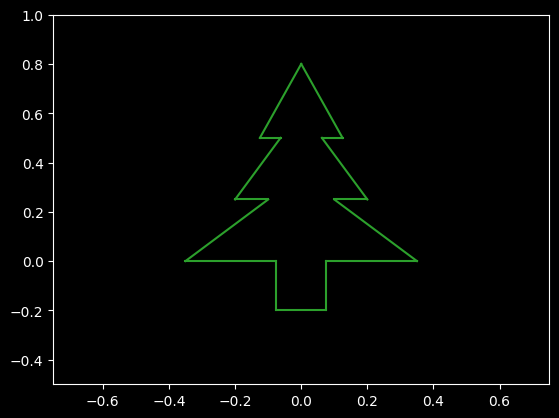

In [4]:
for i in range(len(polygon) - 1):
    x = polygon[i]
    y = polygon[i + 1]

    plt.plot([x[0], y[0]], [x[1], y[1]], color="tab:green")
plt.plot([polygon[-1][0], polygon[0][0]], [polygon[-1][1], polygon[0][1]], color="tab:green")
plt.xlim(-0.75, 0.75)
plt.ylim(-0.5, 1.0)

In [5]:
0.5 + 5 / 44, (27) / 44

(0.6136363636363636, 0.6136363636363636)

(-0.5, 1.0)

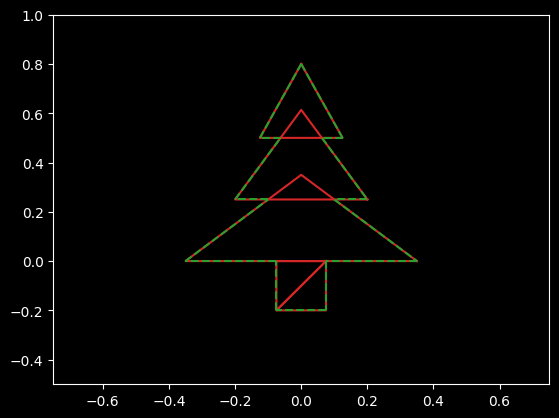

In [6]:
triangle_top = [
    (Decimal('0.0') * scale_factor, tip_y * scale_factor),
    (top_w / Decimal('2') * scale_factor, tier_1_y * scale_factor),
    (-(top_w / Decimal('2')) * scale_factor, tier_1_y * scale_factor),
]

triangle_middle = [
    (mid_w / Decimal('2') * scale_factor, tier_2_y * scale_factor),
    (-mid_w / Decimal('2') * scale_factor, tier_2_y * scale_factor),
    (0.0, (0.5 + 5 / 44) * scale_factor),
]

triangle_bottom = [
    (base_w / Decimal('2') * scale_factor, base_y * scale_factor),
    (-(base_w / Decimal('2')) * scale_factor, base_y * scale_factor),
    (0.0 * scale_factor, 0.35 * scale_factor),
]

triangle_trunk0 = [
    (trunk_w / Decimal('2') * scale_factor, base_y * scale_factor),
    (trunk_w / Decimal('2') * scale_factor, trunk_bottom_y * scale_factor),
    (-(trunk_w / Decimal('2')) * scale_factor, trunk_bottom_y * scale_factor),
]
triangle_trunk1 = [
    (trunk_w / Decimal('2') * scale_factor, base_y * scale_factor),
    (-(trunk_w / Decimal('2')) * scale_factor, trunk_bottom_y * scale_factor),
    (-(trunk_w / Decimal('2')) * scale_factor, base_y * scale_factor),
]

triangles = [
    triangle_top,
    triangle_middle,
    triangle_bottom,

    triangle_trunk0,
    triangle_trunk1,
]

for t in triangles:
    plt.plot([ti[0] for ti in t + t[:1]], [ti[1] for ti in t + t[:1]], color="tab:red")

for i in range(len(polygon) - 1):
    x = polygon[i]
    y = polygon[i + 1]

    plt.plot([x[0], y[0]], [x[1], y[1]], color="tab:green", linestyle="--")
plt.plot([polygon[-1][0], polygon[0][0]], [polygon[-1][1], polygon[0][1]], color="tab:green", linestyle="--")
plt.xlim(-0.75, 0.75)
plt.ylim(-0.5, 1.0)

In [7]:
import jax


def rotate(x, alpha):
    c, s = jax.numpy.cos(alpha), jax.numpy.sin(alpha)
    R = jax.numpy.array([[c, -s], [s, c]])
    xr = R @ x
    return xr

In [8]:
trees = jax.numpy.array(triangles)

trees_r = jax.vmap(jax.vmap(rotate, (0, None)), (0, None))(trees, 0.5)

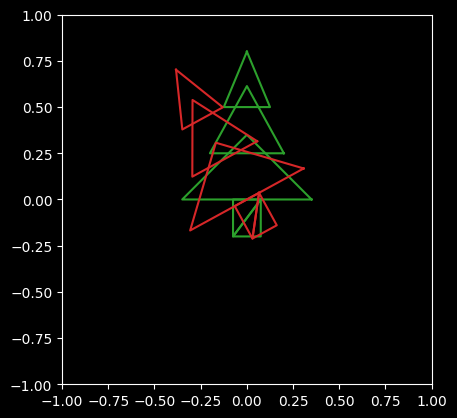

In [9]:
def plot_tree(tree, color="tab:green"):
    for i in range(5):
        tree_x = tree[i, ..., 0].tolist()
        tree_y = tree[i, ..., 1].tolist()
        plt.plot([xi for xi in tree_x + tree_x[:1]], [xi for xi in tree_y + tree_y[:1]], color=color)


plot_tree(trees)
plot_tree(trees_r, color="tab:red")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal')


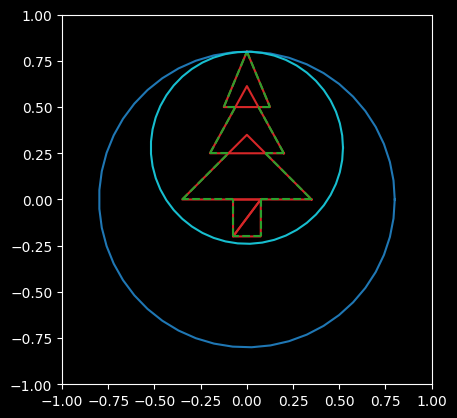

In [24]:
triangle_top = [
    (Decimal('0.0') * scale_factor, tip_y * scale_factor),
    (top_w / Decimal('2') * scale_factor, tier_1_y * scale_factor),
    (-(top_w / Decimal('2')) * scale_factor, tier_1_y * scale_factor),
]

triangle_middle = [
    (mid_w / Decimal('2') * scale_factor, tier_2_y * scale_factor),
    (-mid_w / Decimal('2') * scale_factor, tier_2_y * scale_factor),
    (0.0, (0.5 + 5 / 44) * scale_factor),
]

triangle_bottom = [
    (base_w / Decimal('2') * scale_factor, base_y * scale_factor),
    (-(base_w / Decimal('2')) * scale_factor, base_y * scale_factor),
    (0.0 * scale_factor, 0.35 * scale_factor),
]

triangle_trunk0 = [
    (trunk_w / Decimal('2') * scale_factor, base_y * scale_factor),
    (trunk_w / Decimal('2') * scale_factor, trunk_bottom_y * scale_factor),
    (-(trunk_w / Decimal('2')) * scale_factor, trunk_bottom_y * scale_factor),
]
triangle_trunk1 = [
    (trunk_w / Decimal('2') * scale_factor, base_y * scale_factor),
    (-(trunk_w / Decimal('2')) * scale_factor, trunk_bottom_y * scale_factor),
    (-(trunk_w / Decimal('2')) * scale_factor, base_y * scale_factor),
]

triangles = [
    triangle_top,
    triangle_middle,
    triangle_bottom,

    triangle_trunk0,
    triangle_trunk1,
]

for t in triangles:
    plt.plot([ti[0] for ti in t + t[:1]], [ti[1] for ti in t + t[:1]], color="tab:red")

for i in range(len(polygon) - 1):
    x = polygon[i]
    y = polygon[i + 1]

    plt.plot([x[0], y[0]], [x[1], y[1]], color="tab:green", linestyle="--")
plt.plot([polygon[-1][0], polygon[0][0]], [polygon[-1][1], polygon[0][1]], color="tab:green", linestyle="--")
plt.xlim(-1, 1)
plt.ylim(-1, 1.0)
plt.gca().set_aspect('equal')

#
r = 0.8
c = (0, 0)
poly_x = []
poly_y = []
for alpha in np.linspace(0, 2 * np.pi):
    x = c[0] + np.cos(alpha) * r
    y = c[1] + np.sin(alpha) * r
    poly_x.append(x)
    poly_y.append(y)
plt.plot(poly_x, poly_y, color="tab:blue")

#
r = 0.52
c = (0, 0.28)
poly_x = []
poly_y = []
for alpha in np.linspace(0, 2 * np.pi):
    x = c[0] + np.cos(alpha) * r
    y = c[1] + np.sin(alpha) * r
    poly_x.append(x)
    poly_y.append(y)
plt.plot(poly_x, poly_y, color="tab:cyan")